<a href="https://colab.research.google.com/github/rodrigorosalvos/imdb/blob/main/LH_CD_RODRIGOROSALVOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio IMDB

## 1. Configurações e visão geral dos dados

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Padronização para as visualizações
sns.set_style('darkgrid')

In [52]:
# Definindo a random seed para o projeto
np.random.seed(25)

In [53]:
url = 'https://raw.githubusercontent.com/rodrigorosalvos/imdb/refs/heads/main/desafio_indicium_imdb.csv'

In [54]:
# Carregando os dados
df = pd.read_csv(url)

In [55]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## 2. Limpeza e pré-processamento dos dados

In [57]:
# Retirando a coluna Unnamed:, pois é desnecessária
df = df.drop('Unnamed: 0', axis=1)

In [58]:
# Verificando se há registros duplicados
df.duplicated().sum()

np.int64(0)

In [59]:
# Verificando valores nulos
df.isnull().sum()

,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0
Star1,0


In [60]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [61]:
# Irei substituir valores nulos na coluna Certificate com Unrated
df['Certificate'].fillna('Unrated', inplace=True)

/tmp/ipython-input-921537546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Unrated', inplace=True)


In [62]:
# Irei substituir valores nulos na coluna Meta_score pela sua mediana
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)

/tmp/ipython-input-4159171622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)


In [63]:
# Explorando estatísticas básicas
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,9.990000e+02
mean,7.947948,78.131131,2.716214e+05
std,0.272290,11.373766,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,72.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,85.500000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


In [64]:
df.describe(include='object').T

,count,unique,top,freq
Series_Title,999,998,Drishyam,2
Released_Year,999,100,2014,32
Certificate,999,16,U,234
Runtime,999,140,100 min,23
Genre,999,202,Drama,84
Overview,999,999,A man in London tries to help a counter-espion...,1
Director,999,548,Alfred Hitchcock,14
Star1,999,659,Tom Hanks,12
Star2,999,840,Emma Watson,7
Star3,999,890,Rupert Grint,5


Ao tentar transformar a coluna Released_Year em numérica, percebi que um dos filmes está com o valor PG, logo corrigi manualmente, pois é apenas um registro.

In [65]:
print(df['Released_Year'].unique())

['1972' '2008' '1974' '1957' '2003' '1994' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [66]:
df[df['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [67]:
# Substituir o valor PG po 1995 na coluna Released_Year
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = '1995'

In [68]:
# Definindo uma função para limpar os dados, já para posteriormente utilizar nos dados das novas entradas
def limpar_dados(dados):
  dados_limpos = dados.copy()
  dados_limpos['Released_Year'] = pd.to_numeric(dados_limpos['Released_Year'], errors='coerce').astype('int64') # Convertendo a coluna Released_Year para int64
  dados_limpos['Runtime'] = dados_limpos['Runtime'].str.replace(' min', '') # Removendo o termo 'min' da coluna Runtime
  dados_limpos['Runtime'] = dados_limpos['Runtime'].astype('int64') # Convertendo a coluna Runtime para int64
  dados_limpos['Gross'] = dados_limpos['Gross'].str.replace(',', '') # Removendo a vírgula da coluna Gross
  dados_limpos['Gross'] = dados_limpos['Gross'].astype('float64') # Convertendo a coluna Gross para float64
  return dados_limpos

In [69]:
df_limpo = limpar_dados(df)

In [70]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 117.2+ KB


In [71]:
# Irei substituir valores nulos na coluna Gross pela sua mediana
df_limpo['Gross'] = df_limpo['Gross'].fillna(df_limpo['Gross'].median())

In [72]:
df_limpo.describe().round(2)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.00,999.00,999.00,999.00,999.00,9.990000e+02
mean,1991.22,122.87,7.95,78.13,271621.42,6.053338e+07
std,23.30,28.10,0.27,11.37,320912.62,1.014694e+08
min,1920.00,45.00,7.60,28.00,25088.00,1.305000e+03
25%,1976.00,103.00,7.70,72.00,55471.50,5.011838e+06
50%,1999.00,119.00,7.90,79.00,138356.00,2.345744e+07
75%,2009.00,137.00,8.10,85.50,373167.50,6.157656e+07
max,2020.00,321.00,9.20,100.00,2303232.00,9.366622e+08


In [73]:
df_limpo.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [74]:
# Preparando a coluna Genre como multilabel
df_limpo['Genre_list'] = df_limpo['Genre'].str.split(', ')

In [75]:
df_limpo.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_list
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[Crime, Drama]"
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[Action, Crime, Drama]"
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"[Crime, Drama]"
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"[Crime, Drama]"
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"[Action, Adventure, Drama]"


In [76]:
from sklearn.preprocessing import MultiLabelBinarizer

In [77]:
# Aplicando MultiLabelBinarizer para Genre_list
mlb_genre = MultiLabelBinarizer()
genre_encoded = mlb_genre.fit_transform(df_limpo['Genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb_genre.classes_, index=df_limpo.index)
print(f"{len(mlb_genre.classes_)} gêneros únicos")
print(f"Gêneros: {list(mlb_genre.classes_)}")

21 gêneros únicos
Gêneros: ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


## 3. Análise Exploratória dos Dados (EDA)

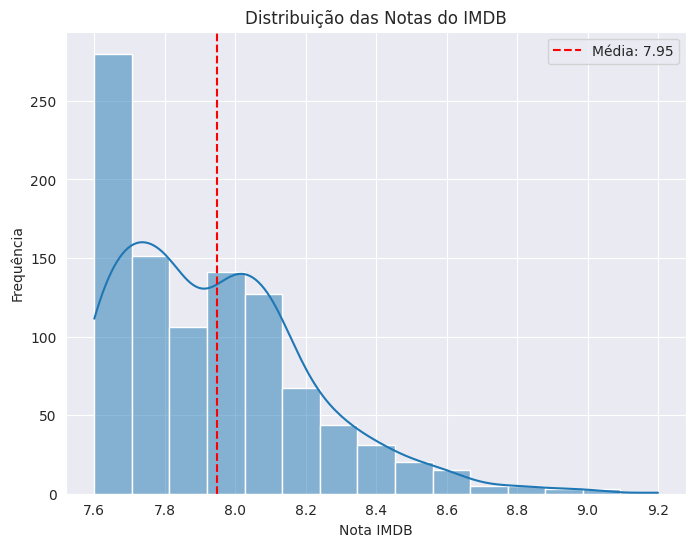

In [78]:
# Histograma das notas do IMDB
plt.figure(figsize=(8, 6))
sns.histplot(df_limpo['IMDB_Rating'], bins=15, kde=True)
plt.title('Distribuição das Notas do IMDB')
plt.xlabel('Nota IMDB')
plt.ylabel('Frequência')
plt.axvline(df_limpo['IMDB_Rating'].mean(), color='red', linestyle='--', label=f'Média: {df_limpo["IMDB_Rating"].mean():.2f}')
plt.legend()
plt.show()

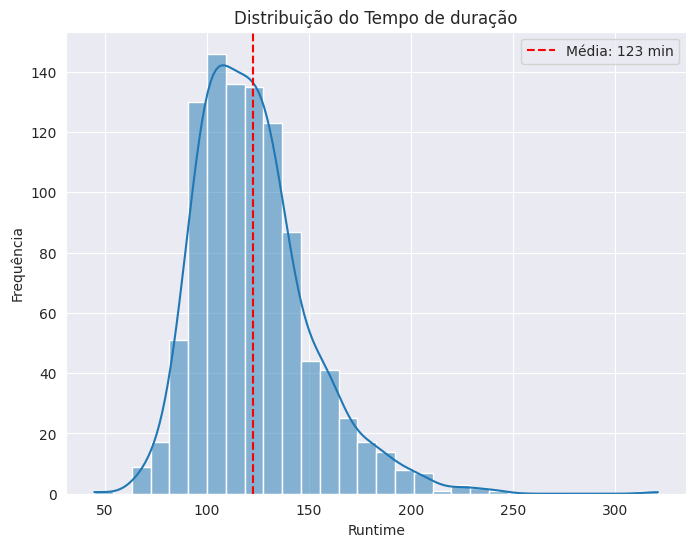

In [79]:
# Histograma do Runtime
plt.figure(figsize=(8, 6))
sns.histplot(df_limpo['Runtime'], bins=30, kde=True)
plt.title('Distribuição do Tempo de duração')
plt.xlabel('Runtime')
plt.ylabel('Frequência')
plt.axvline(df_limpo['Runtime'].mean(), color='red', linestyle='--', label=f'Média: {df_limpo["Runtime"].mean():.0f} min')
plt.legend()
plt.show()

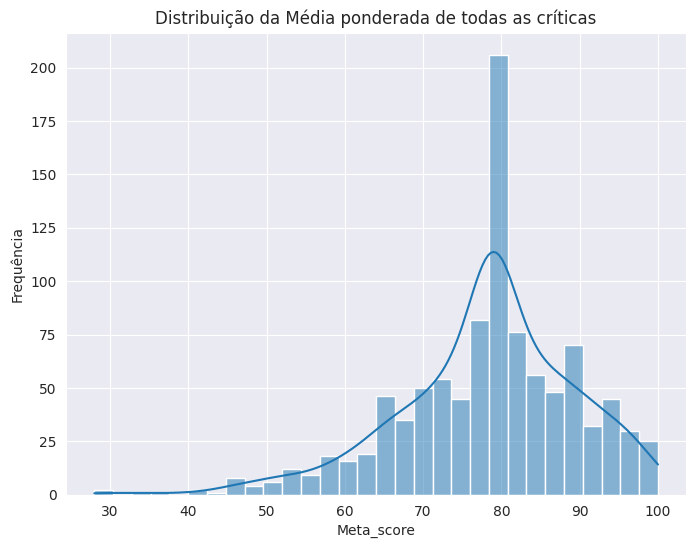

In [80]:
# Histograma do Meta_score
plt.figure(figsize=(8, 6))
sns.histplot(df_limpo['Meta_score'], bins=30, kde=True)
plt.title('Distribuição da Média ponderada de todas as críticas')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.show()

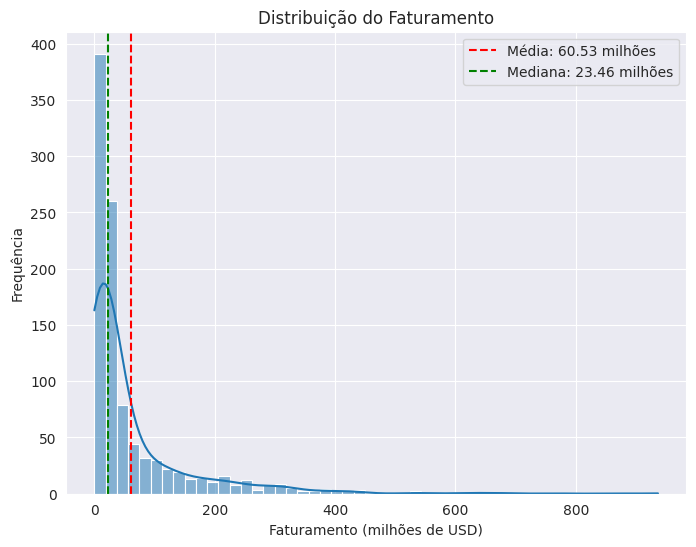

In [81]:
# Ditribuição do Gross em milhões (USD)
plt.figure(figsize=(8, 6))
sns.histplot(df_limpo['Gross'] / 1000000, bins=50, kde=True)
plt.title('Distribuição do Faturamento')
plt.xlabel('Faturamento (milhões de USD)')
plt.ylabel('Frequência')
plt.axvline(df_limpo['Gross'].mean() / 1000000, color='red', linestyle='--', label=f'Média: {df_limpo["Gross"].mean()/1000000:.2f} milhões')
plt.axvline(df_limpo['Gross'].median() / 1000000, color='green', linestyle='--', label=f'Mediana: {df_limpo["Gross"].median()/1000000:.2f} milhões')
plt.legend()
plt.show()

Em média os filmes faturam 60,5 milhões (USD), porém isso está distorcido com os valores dos faturamentos dos outliers. Se o estúdio quiser ser mais conservador deve esperar um retorno da mediana de 23,5 milhões (USD)

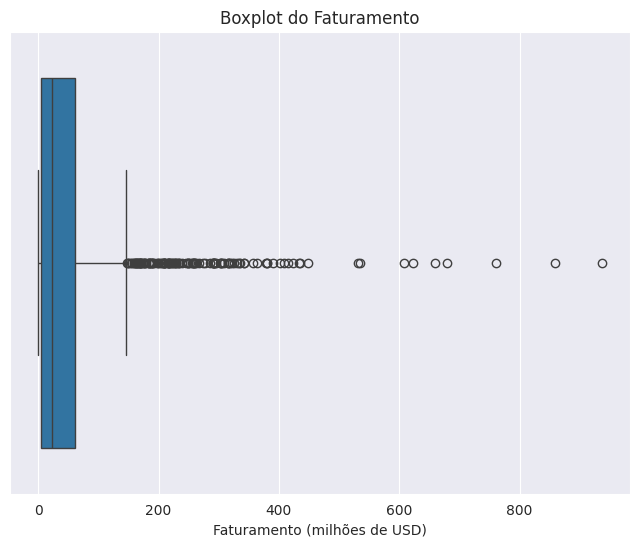

In [82]:
# Boxplot do Gross
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_limpo['Gross'] / 1000000)
plt.title('Boxplot do Faturamento')
plt.xlabel('Faturamento (milhões de USD)')
plt.show()

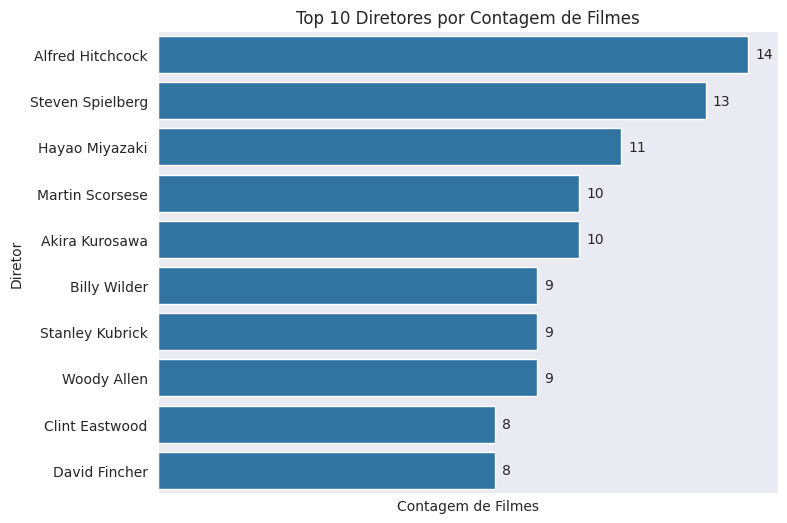

In [83]:
#Top 10 diretores com mais filmes no dataset
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='Director', data=df_limpo, order=df_limpo['Director'].value_counts().iloc[:10].index)
plt.title('Top 10 Diretores por Contagem de Filmes')
plt.xlabel('Contagem de Filmes')
plt.ylabel('Diretor')
plt.xticks([])

# Adicionar os rótulos das contagens ao lado das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

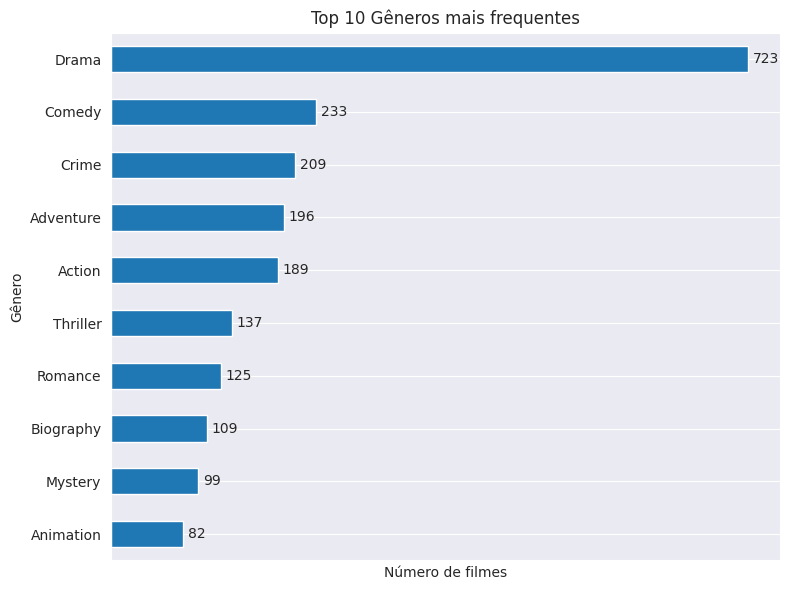

In [84]:
# Top 10 gêneros mais frequentes
plt.figure(figsize=(8, 6))
genre_count = df_limpo['Genre_list'].explode().value_counts().head(10).sort_values(ascending=True)
ax = genre_count.plot(kind='barh')
plt.title('Top 10 Gêneros mais frequentes')
plt.xlabel('Número de filmes')
plt.ylabel('Gênero')
plt.xticks([])
plt.tight_layout()

for i, v in enumerate(genre_count):
    ax.text(v + 5, i, str(v), va='center')

plt.show()

Percebe-se que o gênero Drama tem ocorrência muito maior que os outros.

## 2. Algumas análises

### a. Filme que recomendaria para uma pessoa que não conheço:

In [85]:
# Melhor filme
melhor_filme = df_limpo.loc[df_limpo['IMDB_Rating'].idxmax()]
print(f"Filme '{melhor_filme['Series_Title']}', lançado em {melhor_filme['Released_Year']},\nGênero: {melhor_filme['Genre']}, nota do imdb: {melhor_filme['IMDB_Rating']},\nDiretor: {melhor_filme['Director']}.")

Filme 'The Godfather', lançado em 1972,
Gênero: Crime, Drama, nota do imdb: 9.2,
Diretor: Francis Ford Coppola.


### b. Principais fatores relacionados à expectativa de um maior Faturamento:

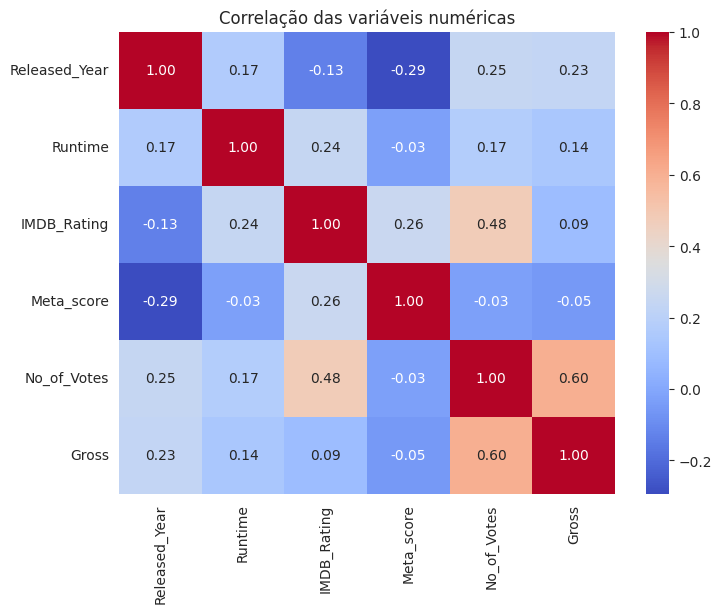

In [86]:
# Matriz correlação das variáveis numéricas
matriz_corr = df_limpo.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das variáveis numéricas')
plt.show()

Percebe-se uma correlação moderada entre o Faturamento e o Número de votos, e entre o Número de votos e a Nota do IMDB.

### c. Insights da coluna Overview:

Nuvem de Palavras mais frequentes em Overview

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
from wordcloud import WordCloud

In [89]:
todas_palavras = ' '.join([texto for texto in df_limpo.Overview])

In [90]:
todas_palavras

'An organized crime dynasty\'s aging patriarch transfers control of his clandestine empire to his reluctant son. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate. A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence. Gandalf and Aragorn lead the World of Men against Sauron\'s army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring. The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption. In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workfo

In [91]:
nuvem_palavras = WordCloud().generate(todas_palavras)

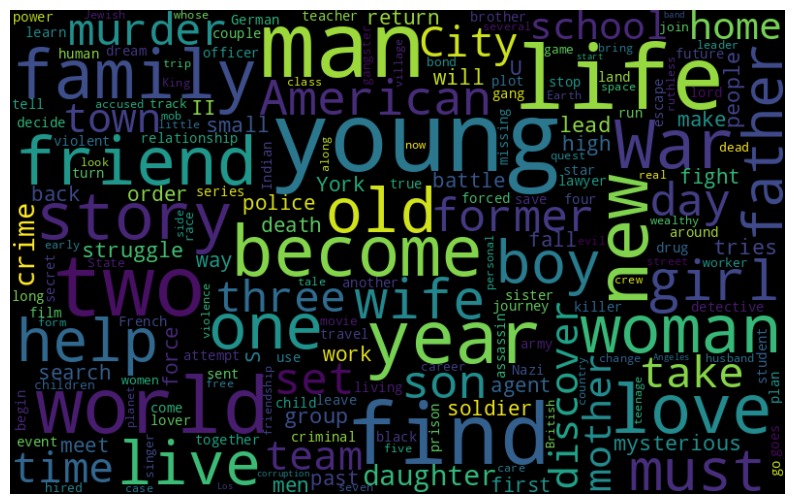

In [92]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=100, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,8))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Percebe-se que alguns temas são mais comuns no Overview, como histórias sobre relações humanas, família, amizade, amor e conflitos. Temas estes mais relacionados ao gênero de Drama.

## 3. Previsão da nota do IMDB

Para prever a IMDB_Rating, um valor numérico contínuo, tratamos o problema como uma regressão, utilizando variáveis numéricas (como Runtime, No_of_Votes, Gross, Meta_score) e categórica transformada (Genre). A performance será avaliada principalmente pelo RMSE.

solução 1

In [93]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [94]:
# Selecionando features numéricas
features_numericas = df_limpo[['Runtime', 'Released_Year', 'Meta_score', 'No_of_Votes', 'Gross']].copy()

In [95]:
# Combinando todas as features
X = pd.concat([features_numericas, genre_df,],axis=1)

In [96]:
X.head()

,Runtime,Released_Year,Meta_score,No_of_Votes,Gross,Action,Adventure,Animation,Biography,Comedy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,175,1972,100.0,1620367,134966411.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152,2008,84.0,2303232,534858444.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,202,1974,90.0,1129952,57300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,1957,96.0,689845,4360000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201,2003,94.0,1642758,377845905.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Variável Target
y = df['IMDB_Rating'].copy()

In [98]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
# Modelo
modelo = xgb.XGBRegressor(objective='reg:squarederror',
                          enable_categorical=True,
                          max_depth=6,
                          learning_rate=0.1,
                          verbosity=0)

In [100]:
# Treinamento
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [101]:
# Predições
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [102]:
# Métricas
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Treino RMSE: {train_rmse:.4f}")
print(f"Treino MAE:  {train_mae:.4f}")
print(f"Teste RMSE: {test_rmse:.4f}")
print(f"Teste MAE:  {test_mae:.4f}")

Treino RMSE: 0.0584
Treino MAE:  0.0446
Teste RMSE: 0.1873
Teste MAE:  0.1476


In [103]:
print(f"Em média, o modelo erra {test_mae:.2f} pontos na escala IMDB.")

Em média, o modelo erra 0.15 pontos na escala IMDB.


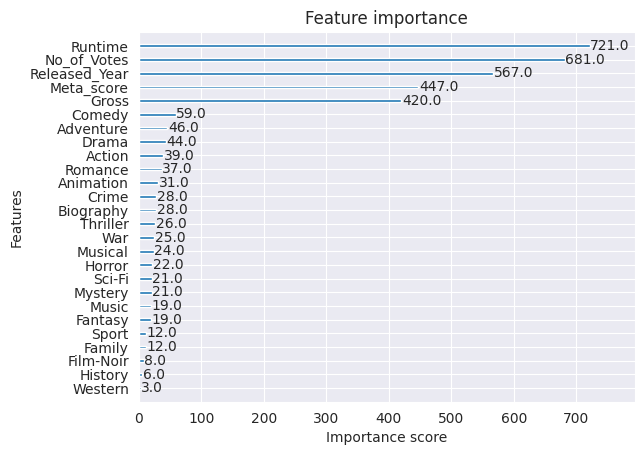

In [104]:
xgb.plot_importance(modelo)
plt.show()

## 4. Previsão da nota do IMDB para um filme que não consta no dataset

In [120]:
filme = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

In [121]:
df_filme = pd.DataFrame([filme])

In [122]:
# Convertendo variáveis
df_filme1 = limpar_dados(df_filme)

In [123]:
df_filme1['Released_Year'] = pd.to_numeric(df_filme1['Released_Year']).astype(int)

In [124]:
# Processando gênero
df_filme1['Genre_list'] = df_filme1['Genre'].str.split(', ')
movie_genre_encoded = mlb_genre.transform(df_filme1['Genre_list'])
movie_genre_df = pd.DataFrame(movie_genre_encoded, columns=mlb_genre.classes_)

In [125]:
# Preparando features
movie_numeric = df_filme1[['Runtime', 'Released_Year', 'Meta_score', 'No_of_Votes', 'Gross']]
movie_X = pd.concat([movie_numeric, movie_genre_df], axis=1)

In [126]:
# Garantindo que as colunas sejam as mesmas do treino
for col in X.columns:
    if col not in movie_X.columns:
        movie_X[col] = 0

movie_X = movie_X[X.columns]

In [128]:
# Realizando a predição
pred = modelo.predict(movie_X)[0]

In [129]:
print(f"Nota IMDB Predita: {pred:.2f}")

Nota IMDB Predita: 8.77


## 5. Salvando o modelo

In [130]:
import joblib

joblib.dump(modelo, 'modelo_xgb.pkl')

['modelo_xgb.pkl']

In [131]:
# Verificando versões
import matplotlib
import sklearn

print(f'pandas {pd.__version__}')
print(f'numpy {np.__version__}')
print(f'matplotlib {matplotlib.__version__}')
print(f'seaborn {sns.__version__}')
print(f'sklearn {sklearn.__version__}')
print(f'xgboost {xgb.__version__}')
print(f'joblib {joblib.__version__}')

pandas 2.2.2
numpy 2.0.2
matplotlib 3.10.0
seaborn 0.13.2
sklearn 1.6.1
xgboost 3.0.4
joblib 1.5.2
